# Evolution of the number of contributors over time

In [ ]:
import sys
print(f'Python {sys.version}')

import IPython
print(f'IPython {IPython.__version__}')

print('\nLibraries:\n')

import matplotlib
import matplotlib.pyplot as plt
print(f'matplotlib {matplotlib.__version__}')

import numpy as np
print(f'numpy {np.__version__}')

import pandas as pd
from pandas.plotting import register_matplotlib_converters
print(f'pandas {pd.__version__}')

Python 3.7.4 (default, Jul  8 2019, 18:31:06) 
[GCC 7.4.0]
IPython 7.6.1

Libraries:

matplotlib 3.1.1
numpy 1.17.0
pandas 0.25.0


In [ ]:
plt.rcParams.update({
    'figure.figsize': [7, 7],
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    'axes.titlesize': 8,
    'legend.frameon': True,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
    'lines.linewidth': 1,
    'figure.dpi': 150.0
})

register_matplotlib_converters()

We reuse the data from the template analysis:

In [ ]:
pullrequests = pd.read_csv('../templates/templates.csv',index_col=0,parse_dates=True)

We eliminate the very first pull request which is a kind of anomaly since it was opened very early, completely ignored by the core developers at the time, and that its author subsequently gained push-access to the repository and became a core developer *before* the rise of pull-based development.

In [ ]:
pullrequests = pullrequests[1:]

In [ ]:
pullrequests_by_author = pullrequests.assign(createdAt=pullrequests.index).groupby('author').agg({
    'createdAt': 'min',
    'number': 'count'
}).sort_values('createdAt')

The list of people (with a known GitHub account) that had push-access to the Coq repository before opening their first PR on GitHub:

In [ ]:
# This list was obtained by matching the list at https://gforge.inria.fr/projects/coq
# with the GitHub account we know of.
# We filtered out the two developers (Matej Kosik @matejkosik, Theo Zimmermann @Zimmi48)
# who gained access to the forge after having opened their first PR.

previous_devs = [
    'herbelin',
    'barras',
    'letouzey',
    'mattam82',
    'gares',
    'backtracking',
    'Matafou',
    'thery',
    'fabj',
    'strub',
    'ppedrot',
    'aspiwack',
    'amahboubi',
    'pirbo',
    'jnarboux',
    'yurug',
    'forestjulien',
    'PierreCasteran',
    'ybertot',
    'PierreCorbineau',
    'maximedenes',
    'silene'
]

In [ ]:
pullrequests_by_author = pullrequests_by_author.assign(alreadyActive=pullrequests_by_author.index.isin(previous_devs))

In [ ]:
pullrequests_by_author = pullrequests_by_author.assign(id=range(1,len(pullrequests_by_author) + 1))

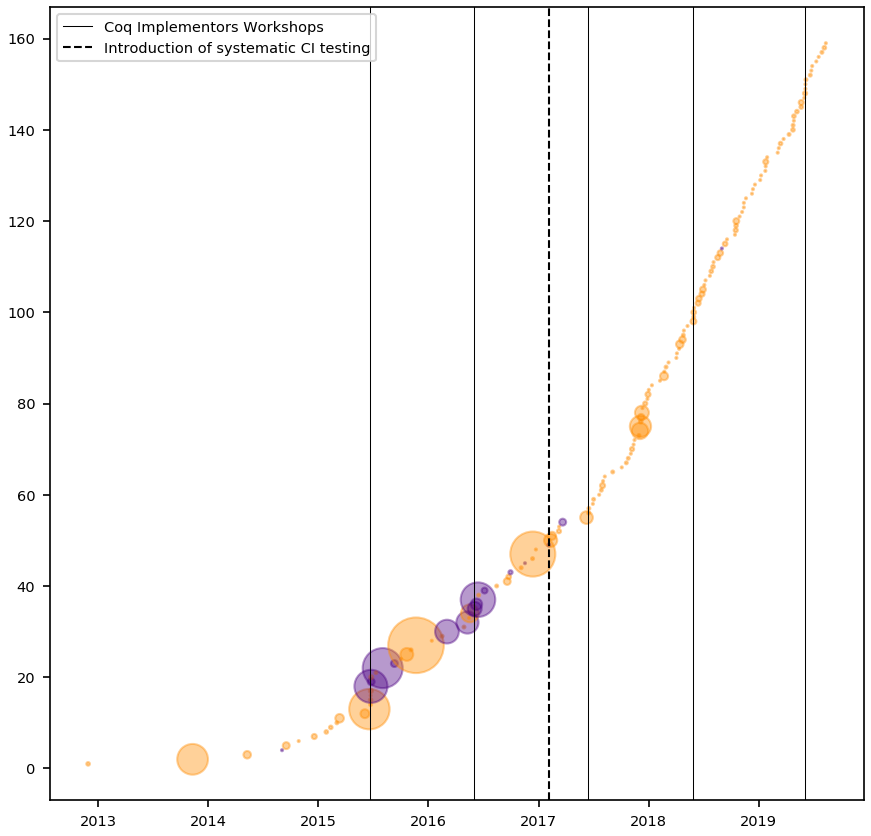

In [ ]:
limit = len(pullrequests_by_author)
plot_data = pullrequests_by_author[:limit]

plt.scatter(
    plot_data['createdAt'],
    range(1,limit+1),
    #s=np.clip(plot_data['number']**2, 1, 30*30),
    #s=np.log(np.exp(1)+plot_data['number'])*plot_data['number'],
    s=plot_data['number'],
    c=['indigo' if active else '#ff8c00' for active in plot_data['alreadyActive']],
    alpha=0.4,
    #marker='_'
)

implementors_workshops = [
    pd.datetime(2015,6,22),
    pd.datetime(2016,5,30),
    pd.datetime(2017,6,12),
    pd.datetime(2018,5,28),
    pd.datetime(2019,6,3)
]

def prs_vertical_lines():
  for date in implementors_workshops:
    line = plt.axvline(x=date,color='black', linestyle="-",lw=0.5)
  line.set_label('Coq Implementors Workshops')
  plt.axvline(x=pd.datetime(2017,2,3),color='black', linestyle="--",lw=1,label='Introduction of systematic CI testing')

prs_vertical_lines()
plt.legend()
plt.savefig('github_contributors.png')
plt.show()

In [ ]:
pullrequests = pullrequests.join(pullrequests_by_author, on='author', rsuffix='_author')

In [ ]:
bugfixes = pullrequests[pullrequests['fix']]
features = pullrequests[pullrequests['feature'] | pullrequests['enhancement']]
doc = pullrequests[pullrequests['onlyDoc'] == True]

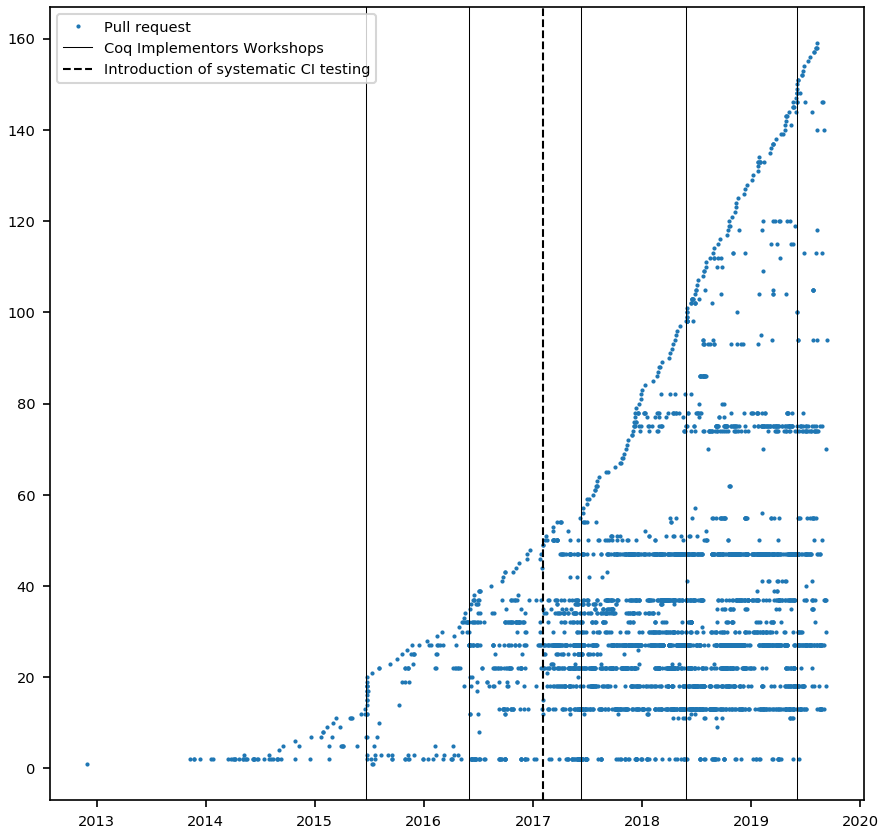

In [ ]:
plt.plot(pullrequests.index, pullrequests['id'],'.',markersize=2,label='Pull request')
#first = True
#for _, dev in pullrequests_by_author[pullrequests_by_author['alreadyActive']].iterrows():
#    if first:
#        first = False
#        plt.axhline(y=dev['id'],color='black',lw=0.3,linestyle='--',label='Developers who had push-access before')
#    else:
#        plt.axhline(y=dev['id'],color='black',lw=0.3,linestyle='--')
#plt.plot(bugfixes.index, bugfixes['id'],'.',markersize=2,color='red',label='Bug fix pull request')
#plt.plot(doc.index, doc['id'],'.',markersize=2,color='cyan',label='Documentation pull request')
#plt.plot(features.index, features['id'],'.',markersize=2,color='green',label='Feature / enhancement pull requests')
prs_vertical_lines()
plt.legend()
plt.savefig('github_contributors2.png')
plt.show()

The top 10 contributors produced 100 pull requests or more. Half of them were already active in the previous push-based model:

In [ ]:
pullrequests_by_author.sort_values('number',ascending=False)[:15]

,createdAt,number,alreadyActive,id
author,,,,
ejgallego,2015-11-21 02:52:16+00:00,713,False,27
SkySkimmer,2016-12-12 14:02:17+00:00,468,False,47
Zimmi48,2015-06-19 12:06:16+00:00,377,False,13
herbelin,2015-08-02 13:18:50+00:00,369,True,22
maximedenes,2016-06-13 15:05:38+00:00,276,True,37
ppedrot,2015-06-24 14:10:29+00:00,252,True,18
JasonGross,2013-11-10 01:03:00+00:00,218,False,2
gares,2016-03-02 20:09:20+00:00,130,True,30
mattam82,2016-05-09 15:52:26+00:00,114,True,32


The contributors who opened a single pull request:

In [ ]:
len(pullrequests_by_author[pullrequests_by_author['number'] == 1])

62

In [ ]:
len(pullrequests_by_author[pullrequests_by_author['number'] == 1]) / len(pullrequests_by_author)

0.389937106918239